In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
data=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\Wholesale customers data.csv")

In [8]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100)for col in df],columns=["Features","percentage"])

In [10]:
percnan

,Features,percentage
0,Channel,0.0
1,Region,0.0
2,Fresh,0.0
3,Milk,0.0
4,Grocery,0.0
5,Frozen,0.0
6,Detergents_Paper,0.0
7,Delicassen,0.0


In [13]:
#normalizing data... Standard Scaler can also be used
from sklearn.preprocessing import normalize
data_scaled=normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


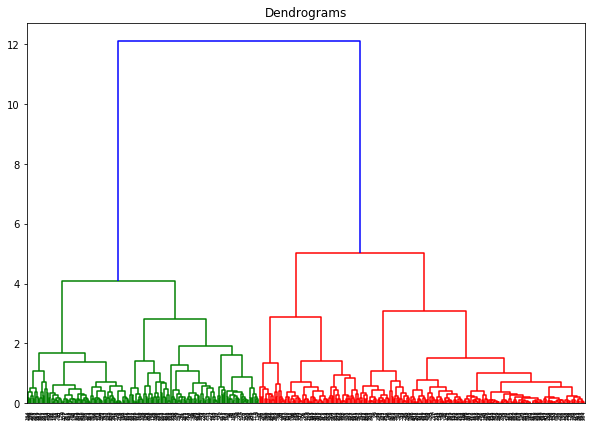

In [15]:
#plotting the clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

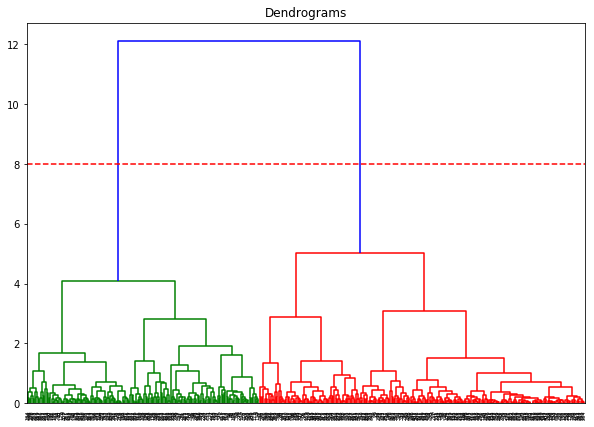

In [17]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=8,color='r',linestyle='--')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1,

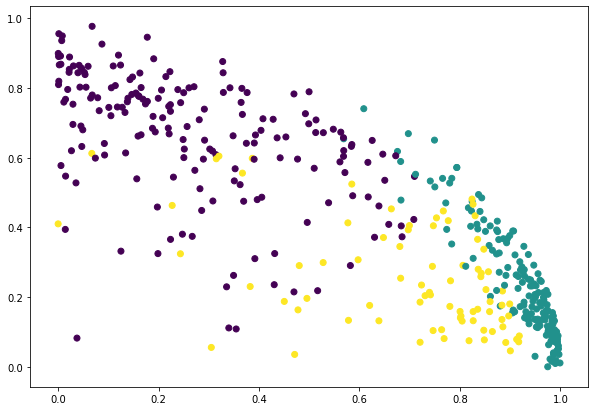

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Fresh'],data_scaled['Grocery'],c=cluster.labels_)